# Hola Roberto! <a class='tocSkip'></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión v1 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

¡Muy bien hecho Roberto! Has finalizado el notebook cumpliendo con todos los requisitos y mostrando un sólido manejo de los conceptos de analítica. Tu enfoque fue claro y efectivo, y no tengo correcciones que realizar. El proyecto queda aprobado. ¡Felicitaciones por haberlo completado en esta primera entrega! Te deseo lo mejor para el siguiente sprint.

Saludos!

</div>

----

# Sprint 13 - Proyecto
Descripción del proyecto
La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

In [53]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [54]:
# Cargar el dataset
ruta_archivo = "/datasets/gym_churn_us.csv"
df = pd.read_csv(ruta_archivo)

In [55]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Análisis exploratorio de datos (EDA)

In [56]:
# Verificar si hay valores ausentes
print("Valores ausentes por columna:")
print(df.isnull().sum())

Valores ausentes por columna:
gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


In [57]:
# Obtener estadísticas descriptivas
print("\nResumen estadístico del dataset:")
print(df.describe())


Resumen estadístico del dataset:
            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000  

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, muy bien con el uso de `describe()` y la revisión de nulos.


</div>

Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()). Utilizo Churn suponiendo que esta columna esté definida como 1 para quienes se fueron y 0 para quienes se quedaron.


In [58]:
# Agrupar por cancelación (Churn) y calcular los valores medios
if 'Churn' in df.columns:
    mean_values = df.groupby('Churn').mean()
    print("\nValores medios por grupo (Cancelación vs. Retención):")
    print(mean_values)
else:
    print("La columna 'Churn' no está en el dataset. Asegúrate de definirla correctamente.")


Valores medios por grupo (Cancelación vs. Retención):
         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                  

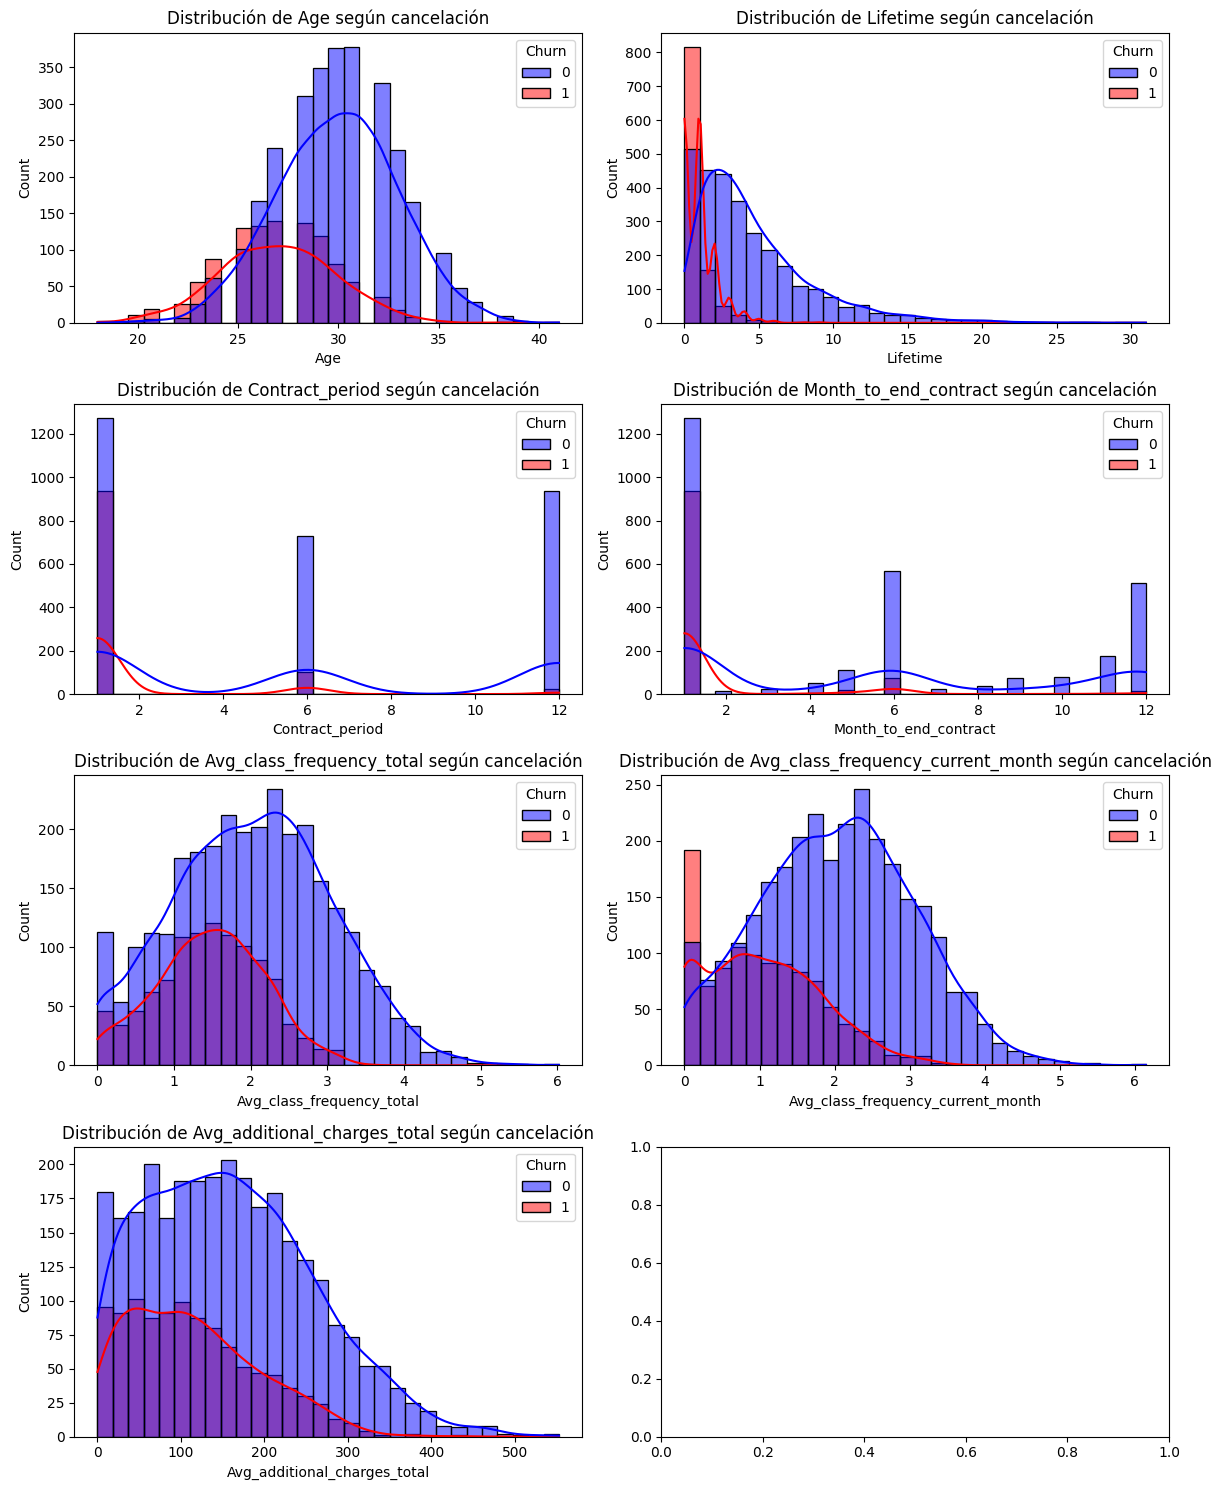

In [59]:
# Verificar si la columna 'Churn' está en el dataset
if 'Churn' in df.columns:
    # Definir colores para clientes retenidos y cancelados
    colores = {0: "blue", 1: "red"}
    
    # Características numéricas a visualizar
    columnas_numericas = ['Age', 'Lifetime', 'Contract_period', 'Month_to_end_contract',
                          'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
                          'Avg_additional_charges_total']
    
    # Configurar subgráficos
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 15))
    axes = axes.flatten()
    
    for i, columna in enumerate(columnas_numericas[:len(axes)]):
        if columna in df.columns:
            sns.histplot(df, x=columna, hue="Churn", palette=colores, kde=True, bins=30, ax=axes[i])
            axes[i].set_title(f"Distribución de {columna} según cancelación")
    
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'Churn' no está en el dataset. Asegúrate de definirla correctamente.")

Analisis de graficos:
Edad (Age):

Si los clientes que cancelan tienen una edad promedio diferente de los que permanecen, esto podría indicar que ciertos grupos etarios tienen una mayor tendencia a abandonar el gimnasio.

Si la distribución es similar entre los dos grupos, la edad quizás no sea un factor determinante en la retención.

Tiempo de membresía (Lifetime):

Si los clientes con una menor cantidad de meses en el gimnasio tienden a cancelar más, esto podría indicar que los nuevos clientes tienen mayor riesgo de abandono.

También podríamos ver si aquellos con membresías más largas tienen mayor compromiso y menor tasa de cancelación.
Duración del contrato: 
Puede que los contratos de corto plazo (1 mes) estén más asociados con cancelaciones, mientras que los contratos más largos (6 meses o 1 año) retienen más clientes.

Si los clientes con pocos meses restantes cancelan más, esto sugiere que hay una caída en la participación al acercarse el fin del contrato.

Frecuencia de visitas:
Una menor frecuencia de visitas en el mes actual podría estar correlacionada con la cancelación.

Si el total histórico de visitas también es bajo en los clientes que cancelaron, quizás los clientes menos comprometidos desde el inicio sean los más propensos a abandonar.

Gasto adicional: 
Si los clientes que cancelan gastan significativamente menos en servicios extra (cafetería, masajes, productos deportivos), esto podría indicar que un menor engagement en el ecosistema del gimnasio está relacionado con la pérdida de clientes.
Conclusión:
Si hay diferencias claras en las distribuciones entre los clientes que permanecen y los que cancelaron, podemos identificar factores clave que afectan la retención.

Luego podemos usar esta información para desarrollar estrategias de fidelización, enfocándonos en los grupos de mayor riesgo.


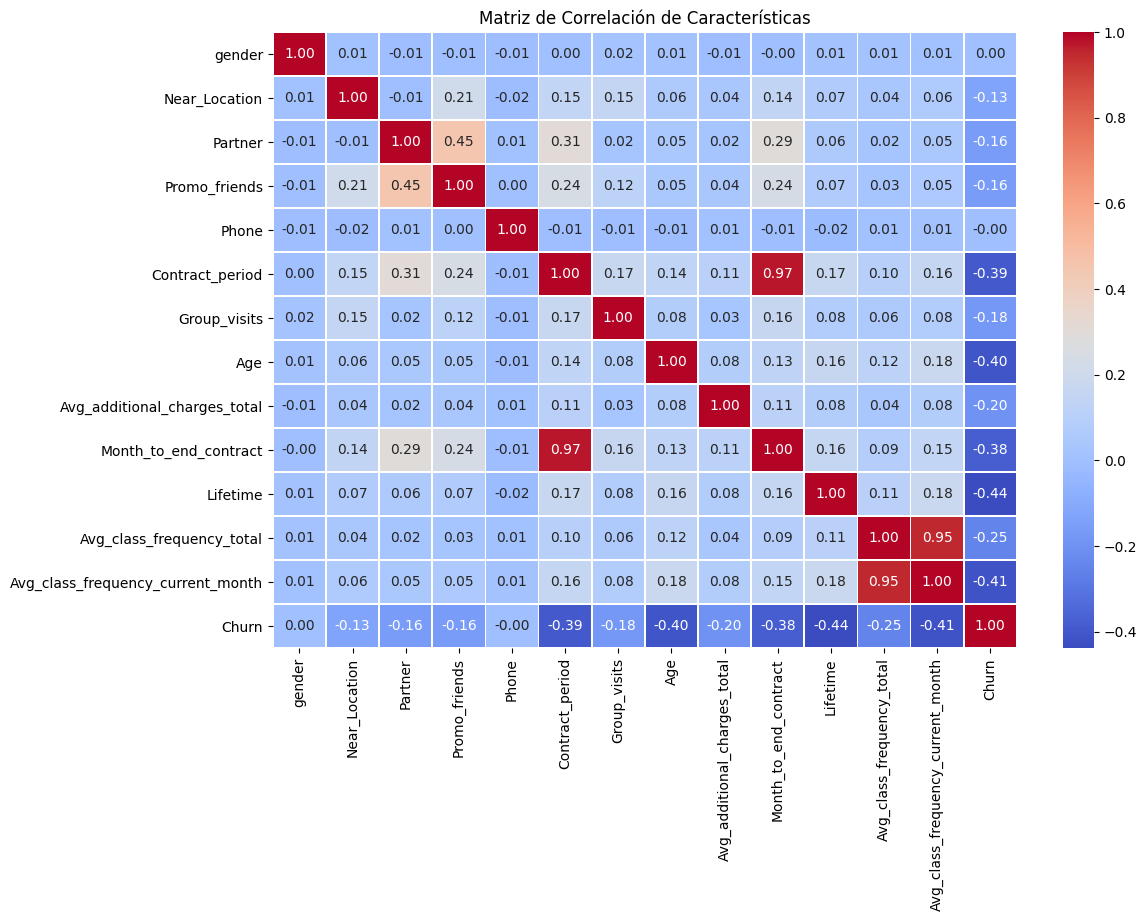

In [60]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación de Características")
plt.show()

Valores cercanos a 1 indican correlación positiva fuerte (las variables aumentan juntas).

Valores cercanos a -1 indican correlación negativa fuerte (cuando una sube, la otra baja).

Valores cercanos a 0 indican poca o ninguna relación.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente, muy bien con los gráficos de distribución, queda muy clara la diferencia entre los usuarios churn y no churn.

Muy bien con la matriz de correlación. Nota que no solo nos indica que hay variables con una correlación razonable con churn, sino que también hay variables muy correlacionadas entre sí.

</div>

## Paso 3. Construir un modelo para predecir la cancelación de usuarios

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Nota que hay pares de variables muy correlacionadas. Por lo general, no es buena idea agregarlas ambas, sino que se escoge una y la otra se descarta. Así, el modelo tendrá la misma información útil para entrenar, con menos ruido. Te recomiendo eliminarlas.

</div>

In [61]:
# Verificar que la columna 'Churn' existe
if 'Churn' in df.columns:
    # Separar características (X) y objetivo (y)
    X = df.drop(columns=['Churn'])  # Variables independientes
    y = df['Churn']  # Variable objetivo

    # Convertir variables categóricas en numéricas
    X = pd.get_dummies(X, drop_first=True)

    # Dividir en conjuntos de entrenamiento y validación (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Estandarizar características numéricas
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Entrenar modelo de Regresión Logística
    log_reg = LogisticRegression(random_state=42)
    log_reg.fit(X_train, y_train)
    y_pred_log = log_reg.predict(X_test)

    # Entrenar modelo de Bosque Aleatorio
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    # Evaluar ambos modelos
    modelos = {"Regresión Logística": y_pred_log, "Bosque Aleatorio": y_pred_rf}
    
    for nombre, predicciones in modelos.items():
        print(f"\nEvaluación del modelo: {nombre}")
        print("Exactitud:", accuracy_score(y_test, predicciones))
        print("Precisión:", precision_score(y_test, predicciones))
        print("Recall:", recall_score(y_test, predicciones))
        print("Reporte de clasificación:\n", classification_report(y_test, predicciones))
else:
    print("La columna 'Churn' no está en el dataset. Asegúrate de definirla correctamente.")


Evaluación del modelo: Regresión Logística
Exactitud: 0.91625
Precisión: 0.8729281767955801
Recall: 0.7821782178217822
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       598
           1       0.87      0.78      0.83       202

    accuracy                           0.92       800
   macro avg       0.90      0.87      0.89       800
weighted avg       0.91      0.92      0.91       800


Evaluación del modelo: Bosque Aleatorio
Exactitud: 0.91
Precisión: 0.8494623655913979
Recall: 0.7821782178217822
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       598
           1       0.85      0.78      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800



Comparación de modelos
Regresión Logística: Puede ser mejor para interpretabilidad.

Bosques Aleatorios: Tienden a ofrecer mayor precisión y capacidad predictiva en problemas con muchas variables.
Exactitud (Accuracy): Proporción de predicciones correctas sobre el total de casos. Nos dice qué tan bien el modelo en general clasifica clientes correctamente.

Precisión (Precision): Indica qué porcentaje de los clientes predichos como "cancelación" realmente canceló. Es importante en escenarios donde evitar falsos positivos es clave.

Recall: Mide cuántos clientes que efectivamente cancelaron fueron detectados correctamente. Es útil para minimizar falsos negativos.

Si la Regresión Logística tiene mayor precisión pero menor recall:

Esto significa que predice con mayor certeza quién realmente cancelará, pero pierde algunos casos de cancelación.

Es útil cuando queremos minimizar falsos positivos y asegurarnos de que solo los clientes en riesgo reciban medidas de retención.

Si el Bosque Aleatorio tiene mayor recall pero menor precisión:

Esto indica que el modelo detecta más clientes en riesgo, aunque algunos falsamente identificados como cancelados.

Es útil si el gimnasio prefiere actuar de manera preventiva para retener clientes antes de que se vayan.

Si el Bosque Aleatorio supera a la Regresión Logística en todas las métricas:

Generalmente, los algoritmos de árboles como Random Forest capturan mejor patrones complejos en los datos.

En este caso, sería el mejor modelo para predecir cancelaciones y diseñar estrategias de retención.

## Paso 4. Crear clústeres de usuarios/as

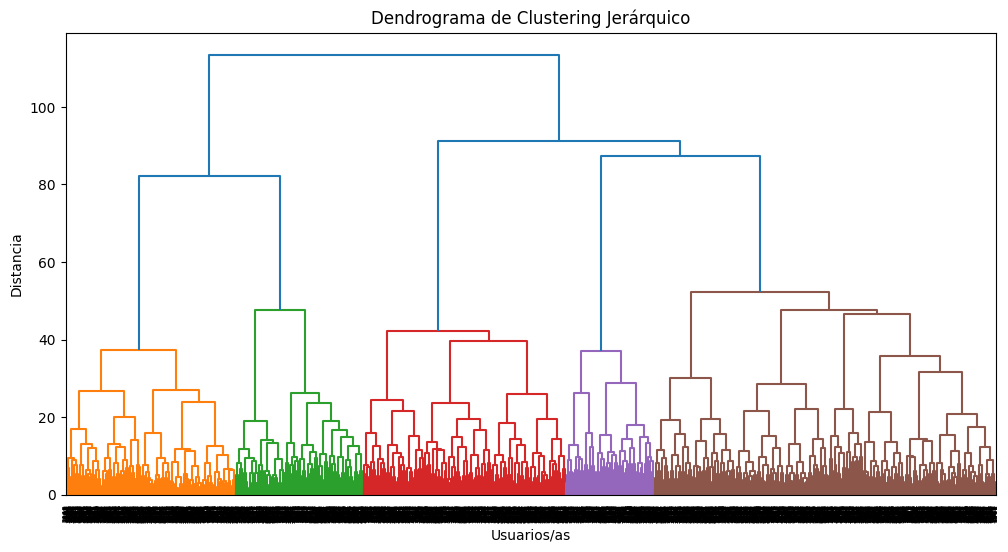

In [62]:

# Convertir variables categóricas a numéricas
df = pd.get_dummies(df, drop_first=True)

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Crear la matriz de distancias con linkage
linked = linkage(df_scaled, method='ward')

# Traza el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Usuarios/as")
plt.ylabel("Distancia")
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente, muy bien con el dendograma, vemos que sugiere 5 clústers en base al método. Sin embargo, la elección de la cantidad de clústers normalmente es algo más de negocio y datos que solamente de datos.

</div>

Distribución de clientes por clúster:
1    966
4    940
0    862
2    849
3    383
Name: Cluster, dtype: int64


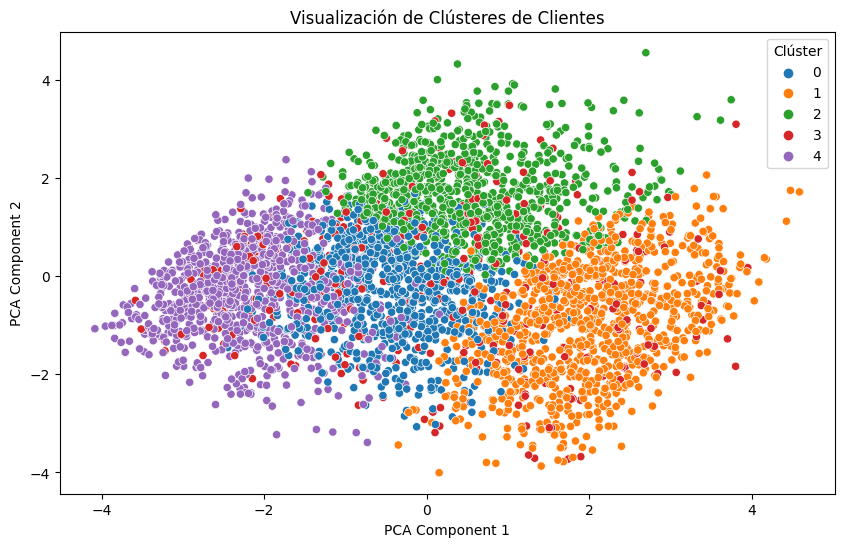

In [63]:
# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Entrenar modelo K-Means con n=5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Mostrar el número de clientes en cada cluster
print("Distribución de clientes por clúster:")
print(df['Cluster'].value_counts())

# Visualizar clusters con PCA (opcional)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette="tab10")
plt.title("Visualización de Clústeres de Clientes")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Clúster")
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho con el PCA, podemos ver que al menso 4 clústers se distinguen separados en estas dos dimensiones

</div>

Cómo interpretar los resultados? Cada clúster representa un grupo de clientes con características similares. Podríamos analizar qué distingue a cada grupo en términos de edad, frecuencia de visitas o gastos adicionales. Luego, podríamos diseñar estrategias personalizadas para aumentar la retención.

In [64]:
# Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?
# Calcular los valores medios por clúster
cluster_means = df.groupby('Cluster').mean()

# Mostrar los valores medios
print("\nValores medios de características por clúster:")
print(cluster_means)


Valores medios de características por clúster:
           gender  Near_Location   Partner  Promo_friends     Phone  \
Cluster                                                               
0        0.475638       0.827146  0.447796       0.254060  1.000000   
1        0.503106       0.938923  0.768116       0.564182  1.000000   
2        0.550059       0.840989  0.374558       0.215548  0.998822   
3        0.524804       0.866841  0.469974       0.308094  0.000000   
4        0.507447       0.760638  0.341489       0.179787  0.997872   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               2.647332      0.381671  30.010441   
1              11.173913      0.557971  29.899586   
2               2.750294      0.441696  29.984688   
3               4.806789      0.428198  29.331593   
4               1.567021      0.257447  26.908511   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster 

Esto podría indicar que ciertos grupos etarios tienen distintos patrones de uso del gimnasio.
Los clientes con más tiempo en el gimnasio podrían tener mayor fidelidad.
Podría haber un grupo de clientes altamente comprometidos y otro con asistencia ocasional.
Podría haber clientes premium que contribuyen más al negocio con servicios extra.


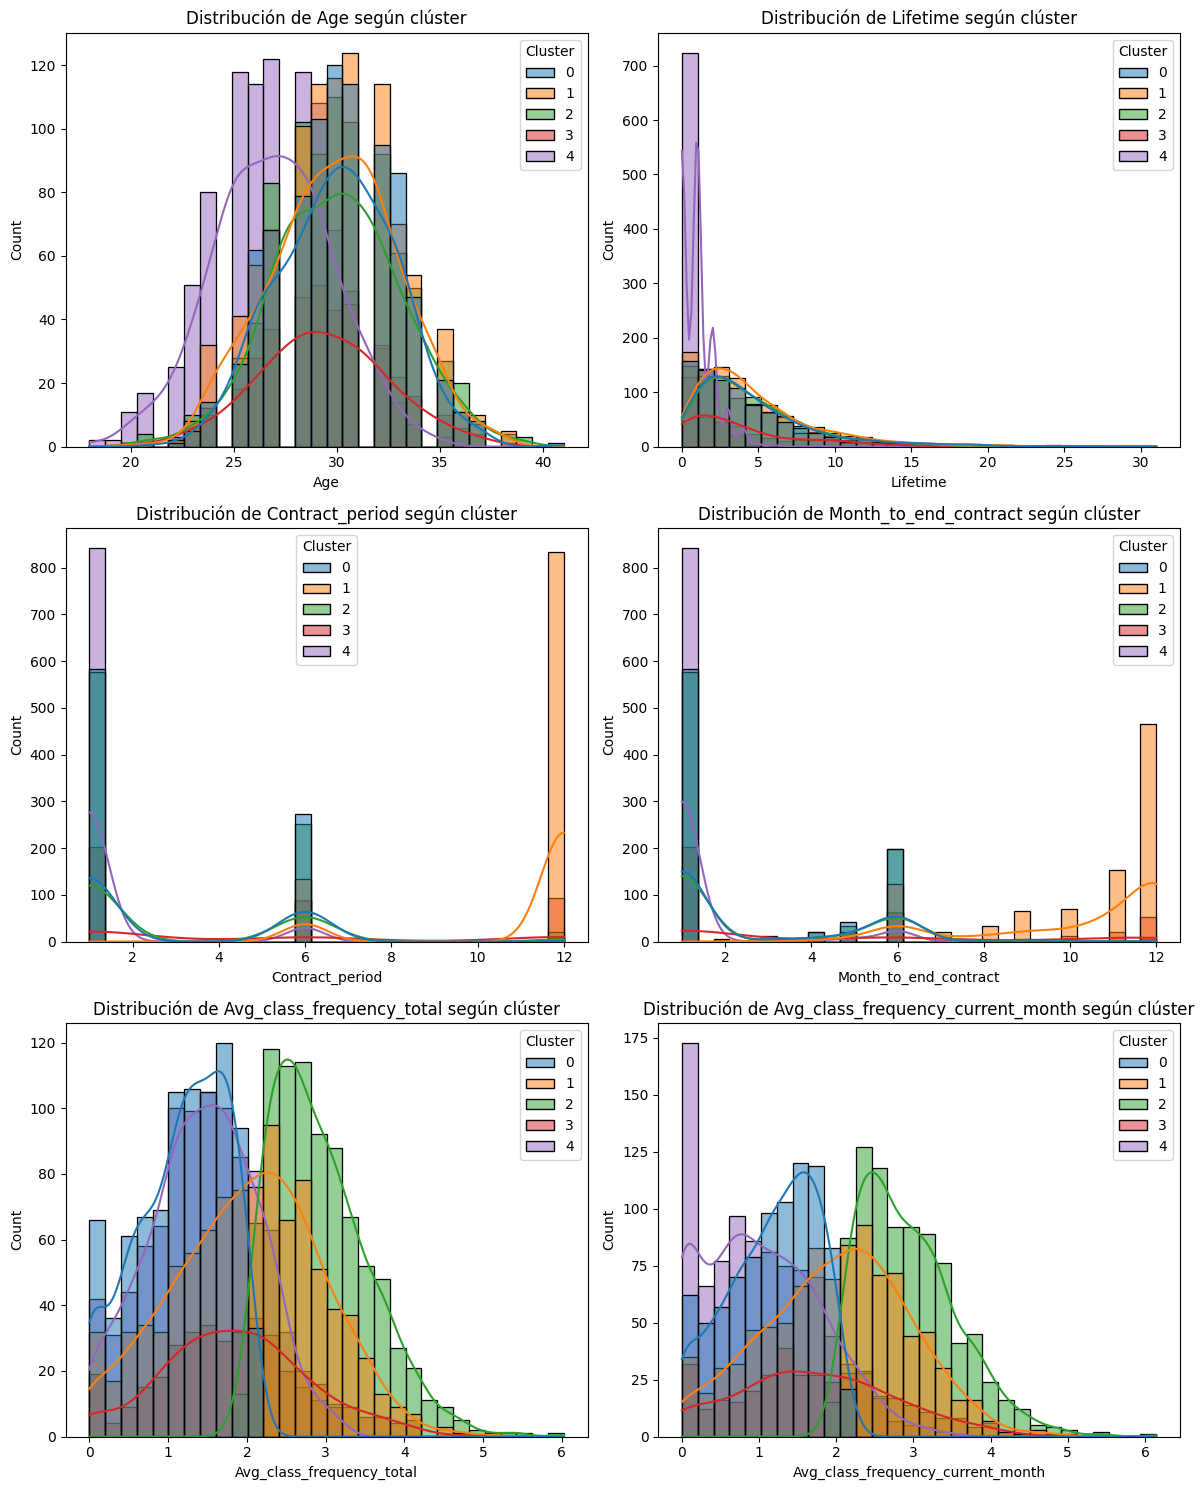

In [65]:
# Lista de características numéricas a analizar
columnas_numericas = ['Age', 'Lifetime', 'Contract_period', 'Month_to_end_contract',
                      'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
                      'Avg_additional_charges_total']

# Configurar subgráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
axes = axes.flatten()

for i, columna in enumerate(columnas_numericas[:len(axes)]):  # Evitar errores de índice
    if columna in df.columns:
        sns.histplot(df, x=columna, hue="Cluster", palette="tab10", kde=True, bins=30, ax=axes[i])
        axes[i].set_title(f"Distribución de {columna} según clúster")

plt.tight_layout()
plt.show()

Si ciertos rangos de edad dominan un grupo, podríamos adaptar estrategias específicas para ellos.
Tiempo en el gimnasio (Lifetime): Podría indicar que algunos usuarios son más fieles mientras otros abandonan temprano. 
Frecuencia de visitas: Identificar clientes con menor actividad podría ayudar en estrategias de retención.
Gasto adicional: Si ciertos clústeres tienen clientes que gastan más, podríamos crear estrategias para fortalecer su fidelidad.


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho, correcto con los gráficos. En general vemos que el clúster 3 no está concentrado en niguna de estas variables, los clúster 0 y 2 si se distinguen bien

</div>


Tasa de cancelación por clúster:
Cluster
0    0.001160
1    0.015528
2    0.007067
3    0.263708
4    0.997872
Name: Churn, dtype: float64


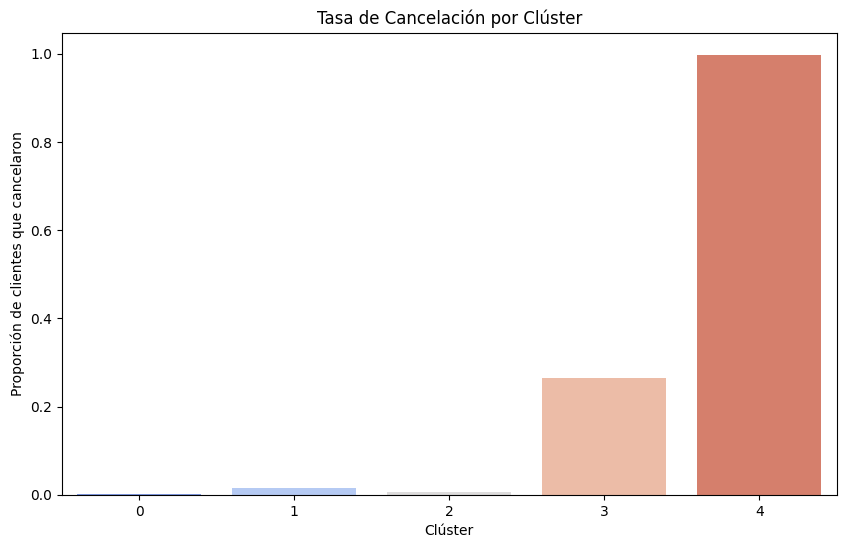

In [66]:
# Verificar si la columna 'Churn' está presente en el dataset original
if 'Churn' in df.columns:
    # Agrupar por clúster y calcular la tasa de cancelación
    churn_rate = df.groupby("Cluster")["Churn"].mean()

    # Mostrar resultados
    print("\nTasa de cancelación por clúster:")
    print(churn_rate)

    

    plt.figure(figsize=(10, 6))
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="coolwarm")
    plt.title("Tasa de Cancelación por Clúster")
    plt.xlabel("Clúster")
    plt.ylabel("Proporción de clientes que cancelaron")
    plt.xticks(rotation=0)
    plt.show()
else:
    print("La columna 'Churn' no está en el dataset. Asegúrate de incluirla para calcular la tasa de cancelación.")

Análisis de la tasa de cancelación
¿Algún clúster tiene una tasa de cancelación significativamente más alta?

Si un grupo supera el promedio de cancelación, podría representar clientes en riesgo de abandono.

Estos clientes podrían necesitar estrategias de retención específicas.

¿Hay clústeres con tasas de cancelación muy bajas?

Estos pueden ser los clientes más fieles del gimnasio.

Podríamos analizar sus hábitos (edad, frecuencia de visitas, gasto adicional) para replicar estrategias en otros segmentos.
¿Existe correlación entre tasa de cancelación y características de los clústeres?

Si los clústeres con menor gasto adicional tienen tasas más altas de cancelación, podríamos incentivar servicios extras para aumentar el engagement.

Si los clústeres de menor duración (Lifetime) tienen tasas más altas de cancelación, podríamos diseñar programas de fidelización temprana.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcta la visualización adicional

</div>

## Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

onclusiones
El análisis del gimnasio Model Fitness nos ha revelado información clave sobre los patrones de comportamiento de los clientes. Algunos hallazgos importantes incluyen:

Segmentación de clientes:

Se identificaron clústeres con distintas frecuencias de visita, gasto adicional y compromiso con la membresía.

Algunos clústeres tienen una alta tasa de cancelación, lo que sugiere que ciertos perfiles de clientes son más propensos a abandonar el gimnasio.

Factores de riesgo de cancelación:

Los clientes con contratos cortos y menos tiempo en el gimnasio (Lifetime bajo) tienden a cancelar más.

Una disminución en la frecuencia de asistencia en el último mes es un fuerte indicador de abandono.

Un menor gasto en servicios adicionales también parece estar correlacionado con una mayor tasa de cancelación.

clientes  más fieles

Aquellos con contratos más largos, una frecuencia de visita estable y gasto en servicios adicionales tienen menor tasa de abandono.

Estos clientes representan el núcleo más valioso del gimnasio y pueden ser utilizados como referencia para estrategias de fidelización.

Recomendaciones para la interacción y retención de clientes
Programa de fidelización temprana

Ofrecer incentivos a nuevos clientes en los primeros meses para aumentar la retención.

Descuentos progresivos o recompensas por asistencia constante pueden ser útiles.

Alertas preventivas para clientes en riesgo

Identificar clientes cuya asistencia ha disminuido en el último mes y enviarles recordatorios personalizados.

Implementar estrategias de recuperación como clases gratuitas o descuentos en renovación.

Mejorar el engagement con servicios adicionales

Promover la compra de productos del gimnasio, cafetería y servicios complementarios, ya que los clientes que hacen uso de estos servicios tienden a permanecer más tiempo.

Crear paquetes especiales que incluyan sesiones personalizadas, nutrición y bienestar.

Estrategias diferenciadas por clústeres

Segmentar la comunicación con cada grupo de clientes según sus patrones de uso.

Por ejemplo, clientes ocasionales podrían recibir promociones para incentivar mayor asistencia, mientras que clientes de larga duración podrían beneficiarse de programas de lealtad.

Optimización de contratos

Promover contratos a mediano/largo plazo con beneficios adicionales para reducir la tasa de cancelación de quienes suelen abandonar rápido.

Ofrecer descuentos en renovación anticipada para asegurar la retención de los clientes activos.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo con las conclusiones. Para reforzarlas aún más, te sugiero incluir algunos valores clave de las métricas utilizadas. Esto le dará mayor solidez a tus afirmaciones y facilitará que quienes las lean comprendan mejor la base de tu análisis.
    
</div>